# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [83]:
# import libraries
import nltk
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger'])
from sqlalchemy import create_engine
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sgkey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sgkey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sgkey\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# load data from database
engine = create_engine('sqlite:///DisasterResponse.db')
df = pd.read_sql_table('1st',engine)
#df.isna().sum

In [3]:
df.shape

(26216, 40)

In [4]:
df.iloc[:,4:].sum()

related                   20282
request                    4474
offer                       118
aid_related               10860
medical_help               2084
medical_products           1313
search_and_rescue           724
security                    471
military                    860
child_alone                   0
water                      1672
food                       2923
shelter                    2314
clothing                    405
money                       604
missing_people              298
refugees                    875
death                      1194
other_aid                  3446
infrastructure_related     1705
transport                  1201
buildings                  1333
electricity                 532
tools                       159
hospitals                   283
shops                       120
aid_centers                 309
other_infrastructure       1151
weather_related            7297
floods                     2155
storm                      2443
fire    

In [5]:
df = df.drop("child_alone",axis = 1)

In [6]:
X = df.message.values
Y = df.drop(["message","id","original","genre"],axis = 1).values

In [7]:
df_genre_scatter = df.groupby("genre").sum().drop(["id"],axis = 1)
df_genre_scatter

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
genre,,,,,,,,,,,,,,,,,,,,,
direct,7446,3696,46,4338,592,471,216,131,46,836,...,78,186,1521,304,315,41,796,63,207,3613
news,10707,604,65,5860,1415,793,441,292,801,790,...,218,866,4280,1747,1445,225,910,415,1052,852
social,2129,174,7,662,77,49,67,48,13,46,...,13,99,1496,104,683,16,749,52,117,610


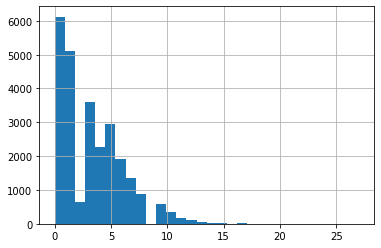

In [8]:
df_cate_hist = df.drop(["message","id","original","genre"],axis = 1)
df_cate_hist["count_cate"] = df_cate_hist.sum(axis = 1)
df_cate_hist["count_cate"].hist(bins = 30)

### 2. Write a tokenization function to process your text data

In [9]:
def tokenize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [10]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(MultinomialNB()))
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
# train classifier
pipeline.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize at 0x00000210902A47B8>,
                                 vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultiOutputClassifier(estimator=MultinomialNB(alpha=1.0,
         

In [12]:
# predict on test data
Y_pred = pipeline.predict(X_test)

In [13]:
col_list = df.drop(["message","id","original","genre"],axis = 1).columns
col_list

Index(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'water', 'food', 'shelter', 'clothing', 'money', 'missing_people',
       'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport',
       'buildings', 'electricity', 'tools', 'hospitals', 'shops',
       'aid_centers', 'other_infrastructure', 'weather_related', 'floods',
       'storm', 'fire', 'earthquake', 'cold', 'other_weather',
       'direct_report'],
      dtype='object')

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [69]:
#target_names = ['class 0', 'class 1']
def show_result(col_list,Y_test,Y_pred):
    f1score = []
    for i, col in enumerate(col_list):
        print(col + ":")
        d = classification_report(Y_test[i], Y_pred[i],output_dict = True)
        df = pd.DataFrame(d)
        print(df)
        f1score.append(d['weighted avg']["f1-score"])
    df_res = pd.Series(f1score,index = col_list)
    return df_res

result_pipe1 = show_result(col_list,Y_test,Y_pred)

related:
              0  accuracy  macro avg  weighted avg
f1-score    1.0       1.0        1.0           1.0
precision   1.0       1.0        1.0           1.0
recall      1.0       1.0        1.0           1.0
support    35.0       1.0       35.0          35.0
request:
                   0    1  accuracy  macro avg  weighted avg
f1-score    0.985507  0.0  0.971429   0.492754      0.985507
precision   1.000000  0.0  0.971429   0.500000      1.000000
recall      0.971429  0.0  0.971429   0.485714      0.971429
support    35.000000  0.0  0.971429  35.000000     35.000000
offer:
                   0          1  accuracy  macro avg  weighted avg
f1-score    0.847458   0.181818  0.742857   0.514638      0.657275
precision   0.735294   1.000000  0.742857   0.867647      0.810924
recall      1.000000   0.100000  0.742857   0.550000      0.742857
support    25.000000  10.000000  0.742857  35.000000     35.000000
aid_related:
              0  accuracy  macro avg  weighted avg
f1-score    1.0 

In [70]:
result_pipe1

related                   1.000000
request                   0.985507
offer                     0.657275
aid_related               1.000000
medical_help              1.000000
medical_products          0.942857
search_and_rescue         1.000000
security                  1.000000
military                  1.000000
water                     1.000000
food                      1.000000
shelter                   0.897959
clothing                  0.985507
money                     0.811791
missing_people            1.000000
refugees                  0.811791
death                     1.000000
other_aid                 0.939394
infrastructure_related    1.000000
transport                 0.929437
buildings                 0.794581
electricity               0.934226
tools                     1.000000
hospitals                 1.000000
shops                     0.957350
aid_centers               1.000000
other_infrastructure      0.860829
weather_related           0.956277
floods              

In [15]:
pipeline.get_params()

{'memory': None,
 'steps': [('vect',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                   dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                   lowercase=True, max_df=1.0, max_features=None, min_df=1,
                   ngram_range=(1, 1), preprocessor=None, stop_words=None,
                   strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                   tokenizer=<function tokenize at 0x00000210902A47B8>,
                   vocabulary=None)),
  ('tfidf',
   TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
  ('clf',
   MultiOutputClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                                 fit_prior=True),
                         n_jobs=None))],
 'verbose': False,
 'vect': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                 dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
  

### 6. Improve your model
Use grid search to find better parameters. 

In [16]:
parameters = {
        'vect__ngram_range': ((1, 1), (1, 2)),
#        'vect__max_df': (0.5, 0.75, 1.0),
#        'vect__max_features': (None, 5000, 10000),
        'tfidf__use_idf': (True, False),
#        'clf__estimator__n_neighbors': [2, 5, 10],
        'clf__estimator__alpha':(0.5, 1.0)
#        'clf__estimator__p': [1,2]
 }

cv = GridSearchCV(pipeline, param_grid=parameters)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [17]:
import time
start = time.time()
cv.fit(X_train, Y_train)
elapsed_time =  time.time() - start
print("elapsed_time:{}".format(elapsed_time))

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


elapsed_time:230.73924350738525


In [18]:
Y_pred = cv.predict(X_test)

In [46]:
print("Classification Report:\n")
result_pipe1 = show_result(col_list,Y_test,Y_pred)
print("\nBest Parameters:", cv.best_params_)


Classification Report:

related:
              0  accuracy  macro avg  weighted avg
f1-score    1.0       1.0        1.0           1.0
precision   1.0       1.0        1.0           1.0
recall      1.0       1.0        1.0           1.0
support    35.0       1.0       35.0          35.0
request:
                   0    1  accuracy  macro avg  weighted avg
f1-score    0.985507  0.0  0.971429   0.492754      0.985507
precision   1.000000  0.0  0.971429   0.500000      1.000000
recall      0.971429  0.0  0.971429   0.485714      0.971429
support    35.000000  0.0  0.971429  35.000000     35.000000
offer:
                   0          1  accuracy  macro avg  weighted avg
f1-score    0.862069   0.333333  0.771429   0.597701      0.711002
precision   0.757576   1.000000  0.771429   0.878788      0.826840
recall      1.000000   0.200000  0.771429   0.600000      0.771429
support    25.000000  10.000000  0.771429  35.000000     35.000000
aid_related:
              0  accuracy  macro avg  weigh

weather_related:
                   0         1  accuracy  macro avg  weighted avg
f1-score    0.969697  0.500000  0.942857   0.734848      0.956277
precision   1.000000  0.333333  0.942857   0.666667      0.980952
recall      0.941176  1.000000  0.942857   0.970588      0.942857
support    34.000000  1.000000  0.942857  35.000000     35.000000
floods:
                   0         1  accuracy  macro avg  weighted avg
f1-score    0.983607  0.888889  0.971429   0.936248      0.970075
precision   0.967742  1.000000  0.971429   0.983871      0.972350
recall      1.000000  0.800000  0.971429   0.900000      0.971429
support    30.000000  5.000000  0.971429  35.000000     35.000000
storm:
              0    1  accuracy  macro avg  weighted avg
f1-score    1.0  1.0       1.0        1.0           1.0
precision   1.0  1.0       1.0        1.0           1.0
recall      1.0  1.0       1.0        1.0           1.0
support    34.0  1.0       1.0       35.0          35.0
fire:
                   0  

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF  

Let’s see if we can do better with a linear support vector machine (SVM), which is widely regarded as one of the best text classification algorithms (although it’s also a bit slower than naïve Bayes).

In [102]:
warnings.simplefilter('ignore')
pipeline2 = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(RandomForestClassifier()))
]);
# train classifier
pipeline2.fit(X_train,Y_train);

NameError: name 'warnings' is not defined

In [72]:
# predict on test data
Y_pred2 = pipeline2.predict(X_test)

result_pipe2 = show_result(col_list,Y_test,Y_pred2)

related:
              0  accuracy  macro avg  weighted avg
f1-score    1.0       1.0        1.0           1.0
precision   1.0       1.0        1.0           1.0
recall      1.0       1.0        1.0           1.0
support    35.0       1.0       35.0          35.0
request:
                   0    1  accuracy  macro avg  weighted avg
f1-score    0.970588  0.0  0.942857   0.485294      0.970588
precision   1.000000  0.0  0.942857   0.500000      1.000000
recall      0.942857  0.0  0.942857   0.471429      0.942857
support    35.000000  0.0  0.942857  35.000000     35.000000
offer:
                   0          1  accuracy  macro avg  weighted avg
f1-score    0.862069   0.333333  0.771429   0.597701      0.711002
precision   0.757576   1.000000  0.771429   0.878788      0.826840
recall      1.000000   0.200000  0.771429   0.600000      0.771429
support    25.000000  10.000000  0.771429  35.000000     35.000000
aid_related:
              0  accuracy  macro avg  weighted avg
f1-score    1.0 

In [73]:
class ContainsNumbers(BaseEstimator, TransformerMixin):

    def contains_numbers(self, text):
        sentence_list = nltk.sent_tokenize(text)
        for sentence in sentence_list:
            pos_tags = nltk.pos_tag(tokenize(sentence))
#            first_word, first_tag = pos_tags[0]
            for tag in pos_tags:
                if tag == 'CD':#[(r'^-?[0-9]+(.[0-9]+)?$', 'CD'),   # cardinal numbers
                    return True
        return False

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        X_tagged = pd.Series(X).apply(self.contains_numbers)
        return pd.DataFrame(X_tagged)

pipeline3 = Pipeline([
    ('features', FeatureUnion([

        ('text_pipeline', Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize)),
            ('tfidf', TfidfTransformer())
        ])),

        ('contains_nums', ContainsNumbers())
    ])),

    ('clf', RandomForestClassifier())
])

pipeline3.fit(X_train, Y_train)
Y_pred3 = pipeline3.predict(X_test)

result_pipe3 = show_result(col_list,Y_test,Y_pred3)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


related:
              0  accuracy  macro avg  weighted avg
f1-score    1.0       1.0        1.0           1.0
precision   1.0       1.0        1.0           1.0
recall      1.0       1.0        1.0           1.0
support    35.0       1.0       35.0          35.0
request:
              0  accuracy  macro avg  weighted avg
f1-score    1.0       1.0        1.0           1.0
precision   1.0       1.0        1.0           1.0
recall      1.0       1.0        1.0           1.0
support    35.0       1.0       35.0          35.0
offer:
                   0          1  accuracy  macro avg  weighted avg
f1-score    0.862069   0.333333  0.771429   0.597701      0.711002
precision   0.757576   1.000000  0.771429   0.878788      0.826840
recall      1.000000   0.200000  0.771429   0.600000      0.771429
support    25.000000  10.000000  0.771429  35.000000     35.000000
aid_related:
                   0    1  accuracy  macro avg  weighted avg
f1-score    0.985507  0.0  0.971429   0.492754      0.98

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                   0         1  accuracy  macro avg  weighted avg
f1-score    0.969697  0.500000  0.942857   0.734848      0.956277
precision   1.000000  0.333333  0.942857   0.666667      0.980952
recall      0.941176  1.000000  0.942857   0.970588      0.942857
support    34.000000  1.000000  0.942857  35.000000     35.000000
fire:
                   0         1  accuracy  macro avg  weighted avg
f1-score    0.920635  0.285714  0.857143   0.603175      0.811791
precision   0.852941  1.000000  0.857143   0.926471      0.878151
recall      1.000000  0.166667  0.857143   0.583333      0.857143
support    29.000000  6.000000  0.857143  35.000000     35.000000
earthquake:
                   0         1  accuracy  macro avg  weighted avg
f1-score    0.931034  0.666667  0.885714   0.798851      0.870608
precision   0.870968  1.000000  0.885714   0.935484      0.900461
recall      1.000000  0.500000  0.885714   0.750000      0.885714
support    27.000000  8.000000  0.885714  35.000000     35

In [55]:
print(result_pipe1)

{'related': 1.0, 'request': 0.9855072463768116, 'offer': 0.7110016420361248, 'aid_related': 1.0, 'medical_help': 0.9759772565742714, 'medical_products': 0.9668798862828715, 'search_and_rescue': 0.9855072463768116, 'security': 0.9855072463768116, 'military': 0.9705882352941176, 'water': 1.0, 'food': 0.9855072463768116, 'shelter': 0.8979591836734694, 'clothing': 0.9855072463768116, 'money': 0.9021077283372365, 'missing_people': 1.0, 'refugees': 0.8608294930875576, 'death': 1.0, 'other_aid': 0.9705882352941176, 'infrastructure_related': 0.9855072463768116, 'transport': 0.9428571428571428, 'buildings': 0.7945812807881774, 'electricity': 0.9696145124716553, 'tools': 1.0, 'hospitals': 1.0, 'shops': 0.9573498964803312, 'aid_centers': 1.0, 'other_infrastructure': 0.8117913832199546, 'weather_related': 0.9562770562770563, 'floods': 0.9700754618787406, 'storm': 1.0, 'fire': 0.8117913832199546, 'earthquake': 0.7857142857142857, 'cold': 1.0, 'other_weather': 0.9855072463768116, 'direct_report': 0.

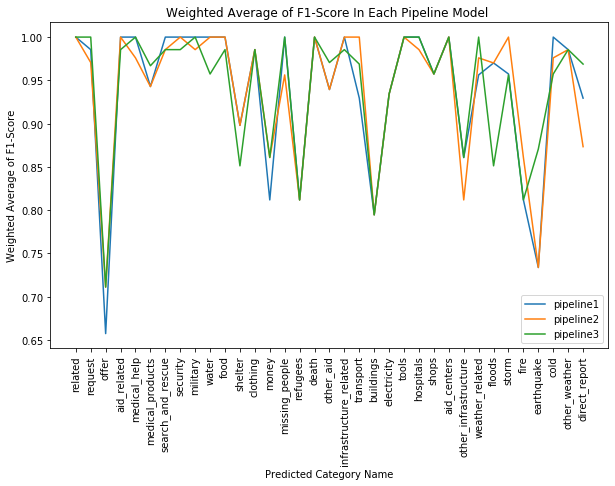

In [100]:
result_f1score_weighted_avg_comp=pd.concat([result_pipe1, result_pipe2,result_pipe3], axis=1)
result_f1score_weighted_avg_comp.columns = ["pipeline1","pipeline2","pipeline3"]
plt.figure(figsize=(10, 6))
plt.title('Weighted Average of F1-Score In Each Pipeline Model ')
plt.xlabel('Predicted Category Name')
plt.xticks(rotation=90)
plt.ylabel('Weighted Average of F1-Score')
plt.plot(result_f1score_weighted_avg_comp )
plt.legend(["pipeline1","pipeline2","pipeline3"])
plt.show()


### 9. Export your model as a pickle file

In [ ]:
import pickle
with open('model.pickle', mode='wb') as fp:
    pickle.dump(pipeline, fp)

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.